# Importing library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read dataset

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")

# Showing Head

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Showing Shape of dataframe

In [4]:
train_df.shape

(891, 12)

# Showing null values by columns

In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Visualize null values by heatmap

<AxesSubplot: >

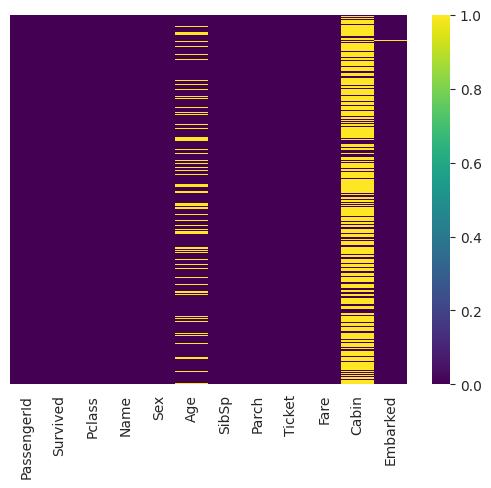

In [6]:
sns.heatmap(train_df.isnull(),yticklabels=False,cmap = 'viridis')

There are some null values in Age, Cabin and Embarked

# First fill all Age null values by useing avg of Pclass. Showing in boxplot

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

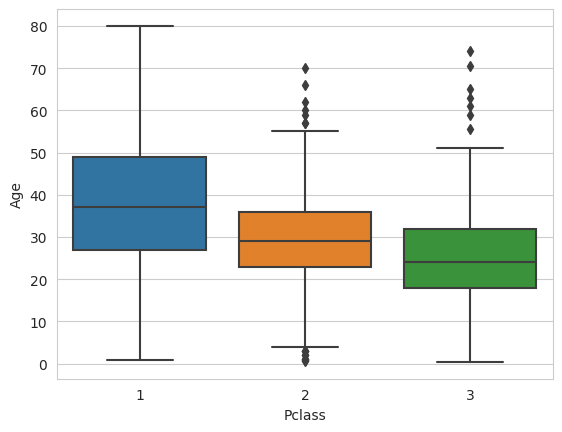

In [7]:
sns.boxplot(x = train_df['Pclass'],y=train_df['Age'])

# Filling all null values in age

In [8]:
def fill_age_null_value(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 25
    else:
        return Age

In [9]:
train_df['Age'] = train_df[['Age','Pclass']].apply(fill_age_null_value,axis=1)

<AxesSubplot: >

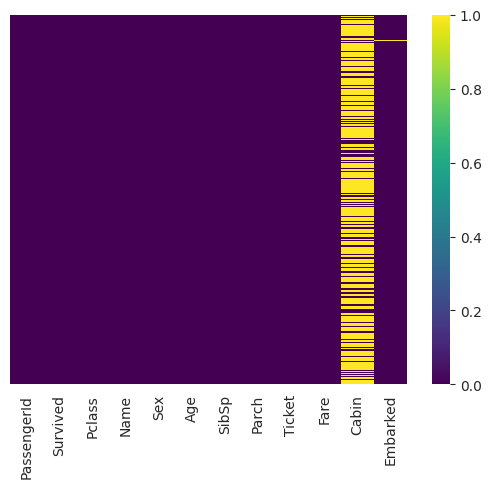

In [10]:
sns.heatmap(train_df.isnull(),yticklabels=False,cmap = 'viridis')

# In age columns all null value filled

In [11]:
train_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

# There are too many null values in cabin so it good to remove this column and all null values

In [12]:
train_df.drop('Cabin',axis = 1,inplace = True)
train_df.dropna(inplace = True)

# visualize null values by heatmap

<AxesSubplot: >

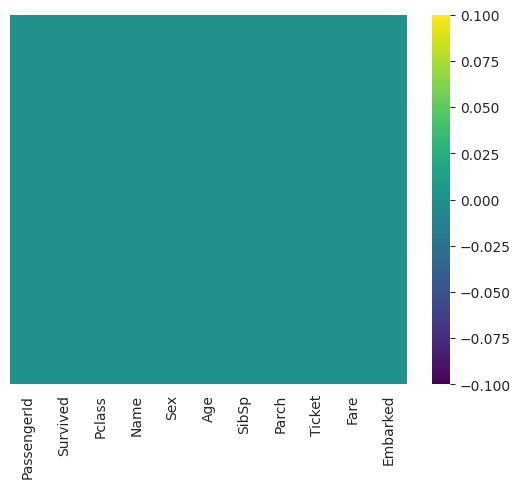

In [13]:
sns.heatmap(train_df.isnull(), yticklabels=False, cmap='viridis')

No null values in this DataFrame

In [14]:
# head of df
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Showing shape

In [15]:
train_df.shape

(889, 11)

# Count Pclass

<AxesSubplot: xlabel='Pclass', ylabel='count'>

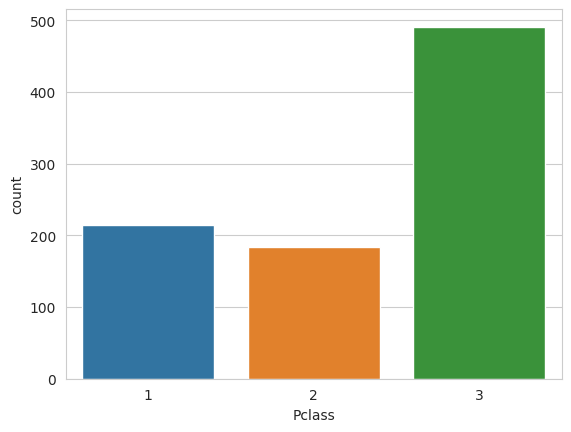

In [16]:
sns.countplot(x='Pclass',data=train_df)

# Count Sibsp

<AxesSubplot: xlabel='SibSp', ylabel='count'>

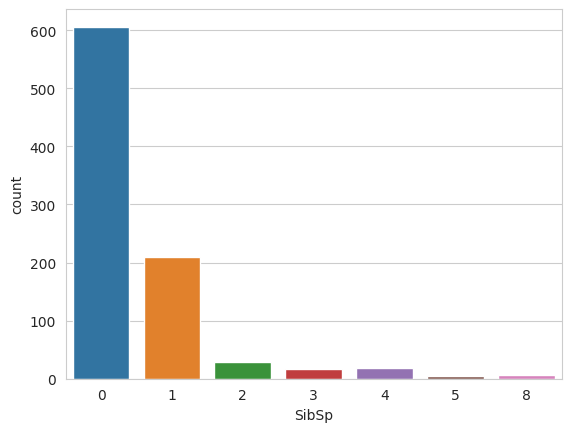

In [17]:
sns.countplot(x='SibSp',data=train_df)

# Count Survied by SibSp

<AxesSubplot: xlabel='Survived', ylabel='count'>

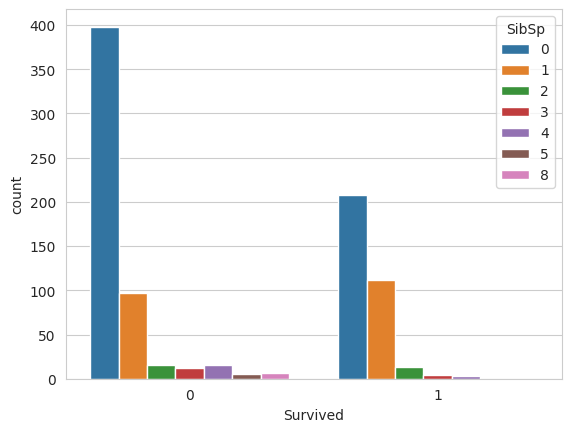

In [18]:
sns.countplot(x='Survived',hue='SibSp',data=train_df)

# Count Survied by Sex

<AxesSubplot: xlabel='Survived', ylabel='count'>

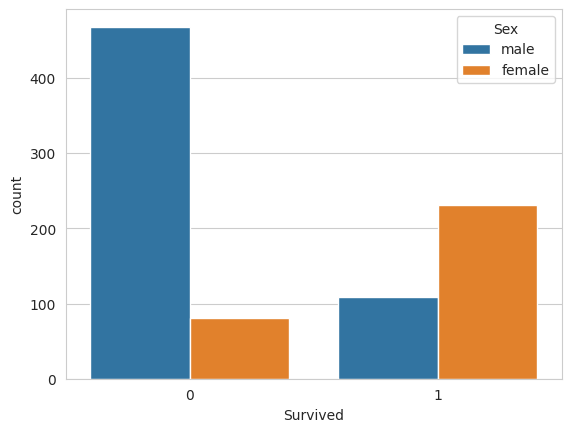

In [19]:
sns.countplot(x='Survived',hue='Sex',data=train_df)

# Count Survied by Pclass

<AxesSubplot: xlabel='Survived', ylabel='count'>

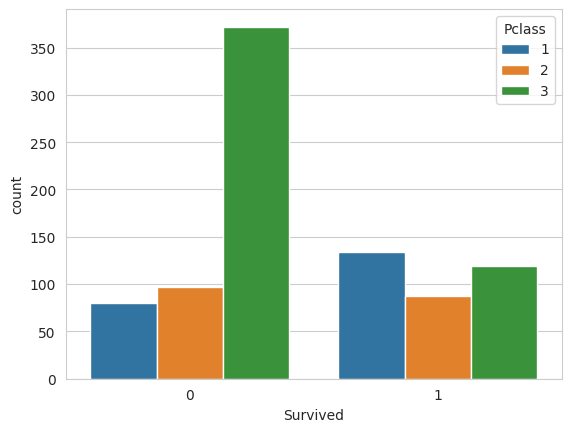

In [20]:
sns.countplot(x='Survived',hue='Pclass',data=train_df)

# Visualize Fare

<AxesSubplot: xlabel='Fare', ylabel='Count'>

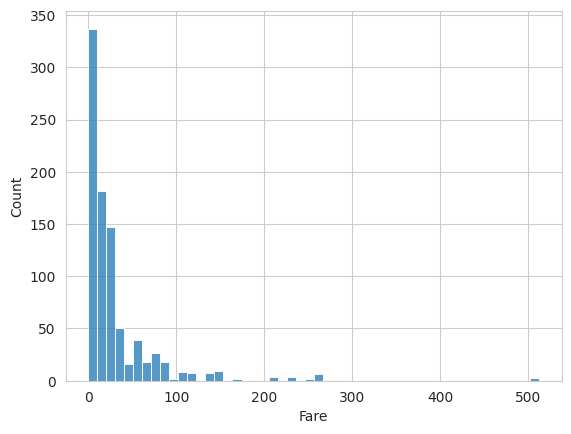

In [21]:
sns.histplot(x='Fare',data=train_df,bins=50)

# Visualize Age

<AxesSubplot: xlabel='Age', ylabel='Count'>

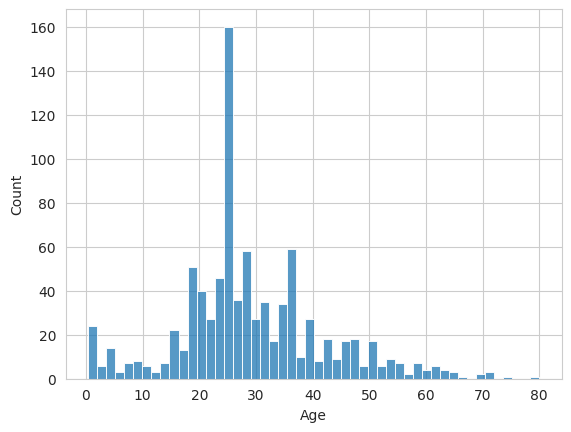

In [22]:
sns.histplot(x='Age',data=train_df,bins=50)

# Create dummies sex and embarked columns for LogisticRegression

In [23]:
sex = pd.get_dummies(train_df['Sex'],drop_first=True)
Embarked = pd.get_dummies(train_df['Embarked'],drop_first= True)

# Drop String columns for logistic Predication

In [24]:
train_df.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis = 1,inplace = True)

# Concat dummies columns with Dataframe

In [25]:
train_df = pd.concat([train_df,sex,Embarked],axis = 1)

# Showing latest columns

In [26]:
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


# Import training library

In [27]:
from sklearn.model_selection import train_test_split

# Select all integer columns in x only remove Predict column. 
# In Y only Predict column


In [28]:
x = train_df.drop('Survived',axis = 1)
y = train_df['Survived']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

# Import LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log = LogisticRegression(max_iter=1000)

In [32]:
log.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

# Predict

In [33]:
predication = log.predict(x_test)

In [34]:
predication

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

# Import classification_report for check accuracy

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,predication))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



83% Accuracy its good

# Check Accuracy score

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,predication)

0.8314606741573034

83 %

# Import Test data

In [39]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [40]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Cleaning Data

<AxesSubplot: >

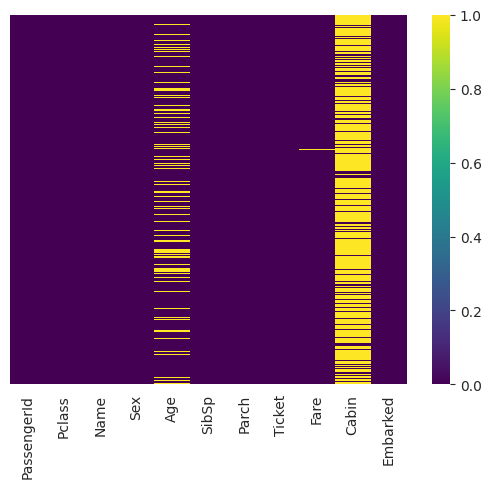

In [41]:
sns.heatmap(test_df.isnull(),yticklabels=False,cmap = 'viridis')

In [42]:
def fill_age_null_value(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 25
    else:
        return Age

In [43]:
test_df['Age'] = test_df[['Age','Pclass']].apply(fill_age_null_value,axis=1)

<AxesSubplot: >

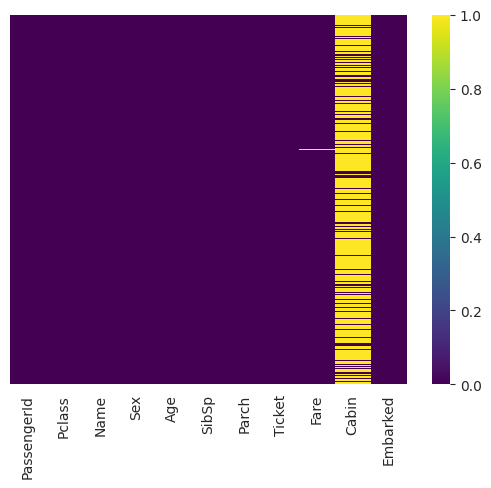

In [44]:
sns.heatmap(test_df.isnull(),yticklabels=False,cmap = 'viridis')

In [45]:
test_df.drop('Cabin',axis = 1,inplace = True)

# Fill Fare nan value with median

In [46]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

<AxesSubplot: >

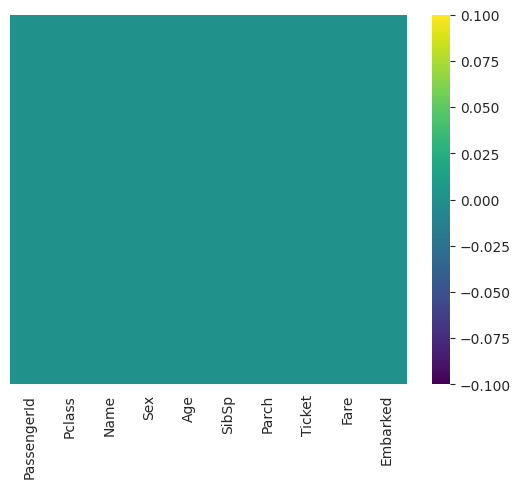

In [47]:
sns.heatmap(test_df.isnull(),yticklabels=False,cmap = 'viridis')

NO null value in this data frame

# Create dummies for LogisticRegression 

In [48]:
sex1 = pd.get_dummies(test_df['Sex'],drop_first=True)
embark1 = pd.get_dummies(test_df['Embarked'],drop_first=True)

In [49]:
test_df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [50]:
test_df = pd.concat([test_df,sex1,embark1],axis = 1)

In [51]:
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [52]:
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,25.0,0,0,8.0500,1,0,1
414,1306,1,39.0,0,0,108.9000,0,0,0
415,1307,3,38.5,0,0,7.2500,1,0,1
416,1308,3,25.0,0,0,8.0500,1,0,1


In [53]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [54]:
test_df = test_df.drop('PassengerId', axis=1)

# Predict Test data set 

In [55]:
predictions1 = log.predict(test_df)

In [56]:
predictions1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Submit Prediction

In [57]:
sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [58]:
sub.shape

(418, 2)

In [59]:
sub.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [60]:
sub['Survived'] = predictions1

In [61]:
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [62]:
sub.to_csv("submission.csv",index = False)